<a href="https://colab.research.google.com/github/sean-neary/Project-submission/blob/main/Final_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import csv
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas.testing as tm
from sklearn import datasets
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import statsmodels.api as sm
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from numpy import arange
import itertools
import time
import statsmodels.api as sm
from sklearn.preprocessing import scale 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
df.head()
print("Number of games: ", len(df))
df = df.dropna()
df.head()

Number of games:  16719


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
#Correlation with output variable
cor_target = abs(cor["Global_Sales"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

EU_Sales        0.939313
Global_Sales    1.000000
Name: Global_Sales, dtype: float64

In [ ]:
df1 = df.drop(columns=['Name', 'Genre', 'Critic_Count','User_Count','Developer', 'Rating','Publisher','NA_Sales','JP_Sales','Other_Sales'])
df1.head()

,Platform,Year_of_Release,EU_Sales,Global_Sales,Critic_Score,User_Score
0,Wii,2006.0,28.96,82.53,76.0,8
2,Wii,2008.0,12.76,35.52,82.0,8.3
3,Wii,2009.0,10.93,32.77,80.0,8
6,DS,2006.0,9.14,29.80,89.0,8.5
7,Wii,2006.0,9.18,28.92,58.0,6.6


In [ ]:
#df = pd.get_dummies(df1)
df = df1.drop(columns=['Platform'])
df.head()

,Year_of_Release,EU_Sales,Global_Sales,Critic_Score,User_Score
0,2006.0,28.96,82.53,76.0,8
2,2008.0,12.76,35.52,82.0,8.3
3,2009.0,10.93,32.77,80.0,8
6,2006.0,9.14,29.80,89.0,8.5
7,2006.0,9.18,28.92,58.0,6.6


In [ ]:
df['User_Score'] = df['User_Score'].astype(float, errors = 'raise')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  6825 non-null   float64
 1   EU_Sales         6825 non-null   float64
 2   Global_Sales     6825 non-null   float64
 3   Critic_Score     6825 non-null   float64
 4   User_Score       6825 non-null   float64
dtypes: float64(5)
memory usage: 319.9 KB
None


In [ ]:
df

,Year_of_Release,EU_Sales,Global_Sales,Critic_Score,User_Score
0,2006.0,28.96,82.53,76.0,8.0
2,2008.0,12.76,35.52,82.0,8.3
3,2009.0,10.93,32.77,80.0,8.0
6,2006.0,9.14,29.80,89.0,8.5
7,2006.0,9.18,28.92,58.0,6.6
...,...,...,...,...,...
16667,2001.0,0.00,0.01,46.0,2.4
16677,2002.0,0.00,0.01,81.0,8.8
16696,2014.0,0.01,0.01,80.0,7.6
16700,2011.0,0.00,0.01,61.0,5.8


In [ ]:
dataf=((df-df.min())/(df.max()-df.min()))*20
dataf

,Year_of_Release,EU_Sales,Global_Sales,Critic_Score,User_Score
0,13.548387,20.000000,20.000000,14.823529,16.483516
2,14.838710,8.812155,8.606398,16.235294,17.142857
3,15.483871,7.548343,7.939893,15.764706,16.483516
6,13.548387,6.312155,7.220068,17.882353,17.582418
7,13.548387,6.339779,7.006786,10.588235,13.406593
...,...,...,...,...,...
16667,10.322581,0.000000,0.000000,7.764706,4.175824
16677,10.967742,0.000000,0.000000,16.000000,18.241758
16696,18.709677,0.006906,0.000000,15.764706,15.604396
16700,16.774194,0.000000,0.000000,11.294118,11.648352


In [ ]:
df = dataf

In [ ]:
y = df.Global_Sales

X = df.drop(['Global_Sales'], axis=1).astype('float64')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

(6142, 4) (683, 4) (6142,) (683,)


LinearRegression()

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
a = df["Year_of_Release"].mean()
b = df["EU_Sales"].mean()
c = df["Critic_Score"].mean()
d = df["User_Score"].astype(float).mean()
e = df["Global_Sales"].mean()
print(a,b,c,d,e)

14.475339714049634 0.16304515006171177 13.47578539107946 14.693684337640363 0.1860372621400282


In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
print(predictions[0:5])
print(y_test[0:5])

[ 0.71615539  0.08310162 -0.01121381  0.01078515  0.17000102]
272      1.017935
11819    0.014542
15723    0.002424
5040     0.089675
3591     0.133301
Name: Global_Sales, dtype: float64


Text(0, 0.5, 'Predictions')

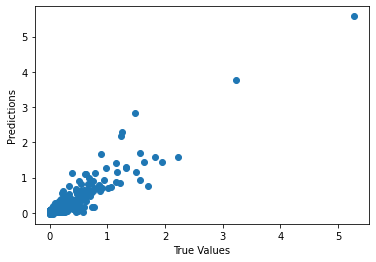

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
print ("Score:", model.score(X_test, y_test))

Score: 0.8328030873295094


In [ ]:
import numpy as np
from sklearn.model_selection import KFold # import KFold
y = df.Global_Sales

X = df.drop(['Global_Sales'], axis=1).astype('float64')

X.head()

,Year_of_Release,EU_Sales,Critic_Score,User_Score
0,13.548387,20.000000,14.823529,16.483516
2,14.838710,8.812155,16.235294,17.142857
3,15.483871,7.548343,15.764706,16.483516
6,13.548387,6.312155,17.882353,17.582418
7,13.548387,6.339779,10.588235,13.406593


In [ ]:
y.head()

0    20.000000
2     8.606398
3     7.939893
6     7.220068
7     7.006786
Name: Global_Sales, dtype: float64

In [ ]:
# load the diabetes datasets
dataset = df
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = linear_model.LinearRegression()
grid = GridSearchCV(estimator=model, param_grid=dict(copy_X=alphas))

grid.fit(X,y)
print(grid)
#summarize the results of the grid search

print(grid.best_estimator_.copy_X)
#model.get_params().keys()

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})
1.0


In [ ]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model1 = linear_model.LinearRegression(copy_X = 1)


# evaluate model
scores = cross_val_score(model1, X_train, y_train, cv=cv, n_jobs=-1)
scores1 = cross_val_score(model1, X_test, y_test, cv=cv, n_jobs=-1)
# report performance



print('Score: %f (%f)' % (mean(scores), std(scores)))
print('Score: %f (%f)' % (mean(scores1), std(scores1)))


Score: 0.846291 (0.078138)
Score: 0.777530 (0.105344)


In [ ]:
model1.fit(X_test, y_test)
row = [14.838710,8.812155	,16.235294	,17.142857]
yhat = model1.predict([row])
# summarize prediction
print('Predicted: %f' % yhat)

Predicted: 7.258930


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:

# load the diabetes datasets
dataset = df
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = DecisionTreeRegressor()
grid = GridSearchCV(estimator=model, param_grid=dict(ccp_alpha=alphas))
model.get_params().keys()
grid.fit(X,y)
print(grid)
#summarize the results of the grid search

print(grid.best_estimator_.ccp_alpha)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})
0.001


In [ ]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model2 = DecisionTreeRegressor(ccp_alpha = 0.001)
# evaluate model
scores2 = cross_val_score(model2, X_train, y_train, cv=cv, n_jobs=-1)
scores3 = cross_val_score(model2, X_test, y_test, cv=cv, n_jobs=-1)
# report performance

print('Score: %.3f (%.3f)' % (mean(scores2), std(scores2)))
print('Score: %.3f (%.3f)' % (mean(scores3), std(scores3)))

Score: 0.747 (0.114)
Score: 0.730 (0.116)


In [ ]:
model2.fit(X, y)
row = [14.838710,8.812155	,16.235294	,17.142857]
yhat = model2.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 8.273


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# load the diabetes datasets
dataset = df
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = RandomForestRegressor()
grid = GridSearchCV(estimator=model, param_grid=dict(ccp_alpha=alphas))

grid.fit(X,y)

#summarize the results of the grid search

print(grid.best_estimator_.ccp_alpha)
#model.get_params().keys()

0.001


In [ ]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model3 = RandomForestRegressor(ccp_alpha = 0.001)
# evaluate model
scores5 = cross_val_score(model3, X_train, y_train, cv=cv, n_jobs=-1)
scores6 = cross_val_score(model3, X_test, y_test, cv=cv, n_jobs=-1)
# report performance

print('Score: %.3f (%.3f)' % (mean(scores5), std(scores5)))
print('Score: %.3f (%.3f)' % (mean(scores6), std(scores6)))

Score: 0.792 (0.083)
Score: 0.761 (0.109)


In [ ]:
model3.fit(X, y)
row = [14.838710,8.812155	,16.235294	,17.142857]
yhat = model3.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 7.413


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# load the diabetes datasets
dataset = df
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = ElasticNet()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

grid.fit(X,y)

#summarize the results of the grid search

print(grid.best_estimator_.alpha)
#model.get_params().keys()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.479e+00, tolerance: 1.860e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.766e+01, tolerance: 1.492e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  

In [ ]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model4 = ElasticNet(alpha = 0)
# evaluate model
scores7 = cross_val_score(model4, X_train, y_train, cv=cv, n_jobs=-1)
scores8 = cross_val_score(model4, X_test, y_test, cv=cv, n_jobs=-1)
# report performance

print('Score: %.3f (%.3f)' % (mean(scores7), std(scores7)))
print('Score: %.3f (%.3f)' % (mean(scores8), std(scores8)))

Score: 0.846 (0.078)
Score: 0.778 (0.105)


In [ ]:
model4.fit(X, y)
row = [14.838710,8.812155	,16.235294	,17.142857]
yhat = model4.predict([row])
# summarize prediction
print('Predicted: %f' % yhat)

Predicted: 8.290647


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.899e+01, tolerance: 1.545e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_re

In [ ]:
# load the diabetes datasets
dataset = df
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

grid.fit(X,y)

#summarize the results of the grid search

print(grid.best_estimator_.alpha)
# model.get_params().keys()

0.0


In [ ]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model5 = Ridge(alpha = 0)
# evaluate model
scores9 = cross_val_score(model5, X_train, y_train, cv=cv, n_jobs=-1)
scores10 = cross_val_score(model5, X_test, y_test, cv=cv, n_jobs=-1)
# report performance

print('Score: %r (%r)' % (mean(scores9), std(scores9)))
print('Score: %r (%r)' % (mean(scores10), std(scores10)))

Score: 0.8462907291045746 (0.07813768693744784)
Score: 0.7775302605496305 (0.10534418355894333)


In [ ]:
model5.fit(X_test, y_test)
row = [14.838710,8.812155	,16.235294	,17.142857]
yhat = model5.predict([row])
# summarize prediction
print('Predicted: %f' % yhat)


Predicted: 7.258930


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# load the diabetes datasets
dataset = df
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

grid.fit(X,y)

#summarize the results of the grid search

print(grid.best_estimator_.alpha)
#model.get_params().keys()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.479e+00, tolerance: 1.860e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.766e+01, tolerance: 1.492e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  

In [ ]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model6 = Lasso(alpha = 0)
# evaluate model
scores11 = cross_val_score(model6, X_train, y_train, cv=cv, n_jobs=-1)
scores12 = cross_val_score(model6, X_test, y_test, cv=cv, n_jobs=-1)
# report performance

print('Score: %.3f (%.3f)' % (mean(scores11), std(scores11)))
print('Score: %.3f (%.3f)' % (mean(scores12), std(scores12)))

Score: 0.846 (0.078)
Score: 0.778 (0.105)


In [ ]:
model6.fit(X, y)
row = [14.838710,8.812155	,16.235294	,17.142857]
yhat = model6.predict([row])
# summarize prediction
print('Predicted: %f' % yhat)

Predicted: 8.290647


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.899e+01, tolerance: 1.545e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_re

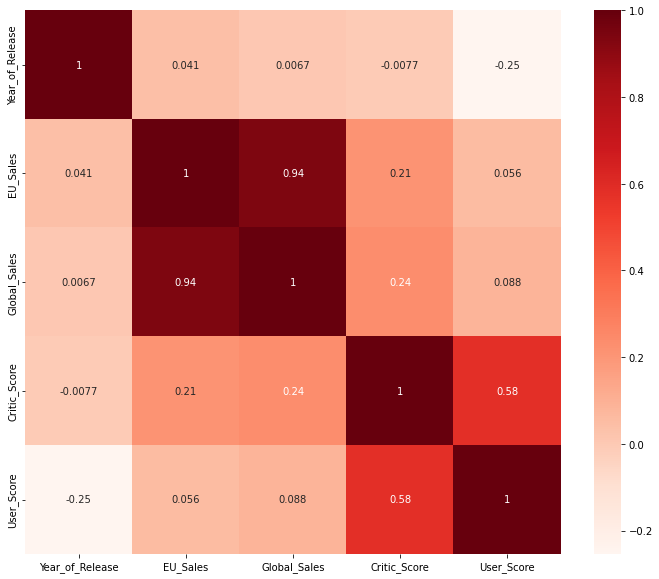

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()